In [1]:
import math
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Joint probability of x (distance of needle center to the nearest line) and $\theta$ (angle between needle and line):

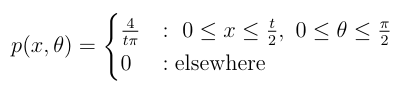

**1. Find the probability for the case of l > t.**

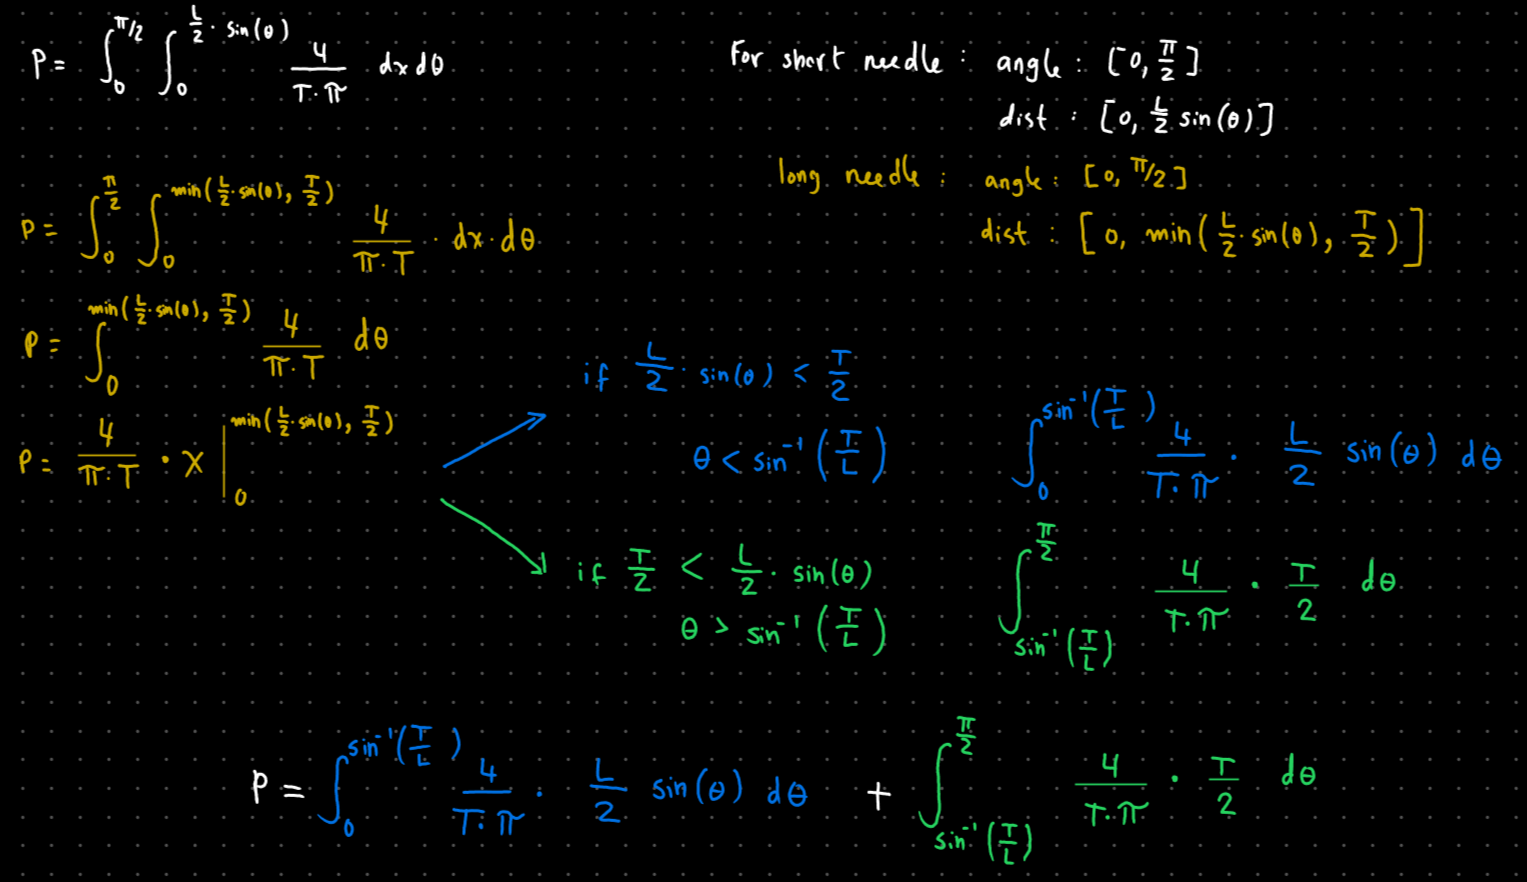

In [2]:
# represent the probability expression symobolically & integrate the manually derived expression above
T, L, theta = sp.symbols('T L theta')

# first case
expression_1 = (4 / (T * sp.pi)) * (L / 2) * sp.sin(theta)
expression_1 = sp.integrate(expression_1, (theta, 0, sp.asin(T/L)))
expression_1 = sp.simplify(expression_1)

# second case
expression_2 = (4 / (T * sp.pi)) * (T / 2)
expression_2 = sp.integrate(expression_2, (theta, sp.asin(T/L), (sp.pi / 2)))
expression_2 = sp.simplify(expression_2)

# combined probability
combined_prob = expression_1 + expression_2
combined_prob

2*L*(1 - sqrt((L**2 - T**2)/L**2))/(pi*T) + (pi - 2*asin(T/L))/pi

In [3]:
# evaluate with real numbers
val = combined_prob.subs({L: 10, T: 5})
print(val.evalf())

0.837248420558245


**2.Find the probability using Monte Carlo simulation for l < t, for the general case and find the value of the π using some special case (e.g. l = 2, and t = 3)**

In [4]:
def monte_carlo_buffon_needle(L, T, num_trials):
    count_crossed = 0

    for _ in range(num_trials):
        # random values for theta and x
        x_center = np.random.uniform(0, T / 2)
        theta = np.random.uniform(0, np.pi / 2)

        # Determine the distance from the needle's center to the line
        # The needle crosses a line if x <= (L/2) * sin(theta)
        if x_center <= (L / 2) * np.sin(theta):
            count_crossed += 1
    
    # calculate the probability
    probability = count_crossed / num_trials
    return probability

# estimates of pi are used to check work.
def estimate_pi(L, T, num_trials):
    probability = monte_carlo_buffon_needle(L, T, num_trials)
    pi_estimate = (2 * L) / (T * probability)
    return pi_estimate


estimate_pi(2, 5, 10_000)

3.194888178913738

**3.Find the probability using Monte Carlo simulation (l > t) for the general case. From the probability formula we found for l < t, the probability is linear with l/t.**

In [5]:
# the function to estimate pi is different than the easier case (L<T),
# take combined probability function from 1 and solve for pi.
P  = sp.symbols('P', real=True, positive=True)
prob_eq = sp.Eq(P, combined_prob)
prob_eq

Eq(P, 2*L*(1 - sqrt((L**2 - T**2)/L**2))/(pi*T) + (pi - 2*asin(T/L))/pi)

In [6]:
solved_for_pi = sp.solve(prob_eq, 'pi')
# solved_for_pi
solved_for_pi[0]

2*(-L*sqrt(1 - T**2/L**2) + L - T*asin(T/L))/(T*(P - 1))

In [7]:
def monte_carlo_buffon_needle_long(L, T, num_trials):
    count_crossed = 0

    for _ in range(num_trials):
        # Generate random values for theta and x
        x_center = np.random.uniform(0, T)
        theta = np.random.uniform(0, np.pi)

        # Calculate the distance from needle center to line
        y = (L / 2) * np.sin(theta)

        # Check if the needle crosses one or more lines
        if x_center <= y or x_center + y >= T:
            count_crossed += 1

    # Calculate the probability
    probability = count_crossed / num_trials
    return probability


def estimate_pi_long(L, T, num_trials):
    probability = monte_carlo_buffon_needle_long(L, T, num_trials)

    # this comes from the <solved_for_pi> variable
    pi_estimate = 2*(-L*math.sqrt(1 - T**2/L**2) + L - T*math.asin(T/L))/(T*(probability - 1))

    return pi_estimate

# test simulation 
l, t, n = 10, 5, 10_000

estimated_probability = monte_carlo_buffon_needle_long(l, t, n)
pi_estimate = estimate_pi_long(l, t, n)

print(f"Estimated probability that the needle crosses at least one line: {estimated_probability}")
print(f"Estimated value of pi: {pi_estimate}")

Estimated probability that the needle crosses at least one line: 0.8278
Estimated value of pi: 3.1253005277160897


**4.After writing your general code in Part 3 plot the Probability vs l/t ratio. Hint: You need to run the simulations for different values of (l/t)**

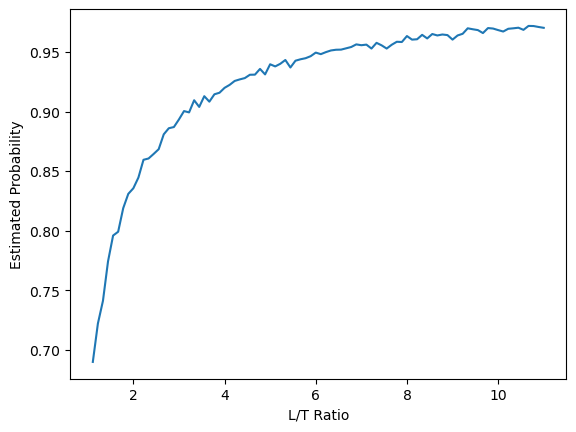

In [19]:
T_constant = 9
data_tracker = {
    'L':range(10,100),
    'T':np.full(90, T_constant),
    'Prob':[]
}

# run simulation for different values of L
for l in data_tracker['L']:
    estimated_probability = monte_carlo_buffon_needle_long(L=l, T=T_constant, num_trials=10_000)
    data_tracker['Prob'].append(estimated_probability)

l_t_ratio = np.array(data_tracker['L']) / data_tracker['T']

plt.plot(l_t_ratio, data_tracker['Prob'])
plt.xlabel('L/T Ratio')
plt.ylabel('Estimated Probability')

plt.show()

**5.Plot the analytic formula for P(l/t) along side your previous result and comment on the result.**

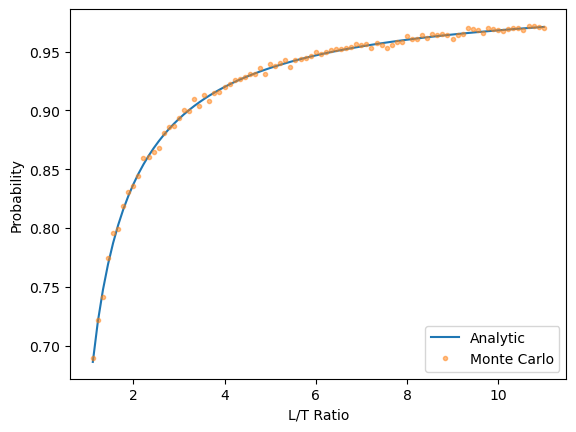

In [21]:
# convert the symbolic expression from problem 1 into a usable function
prob_long = sp.lambdify([L,T],combined_prob, "math")

y_values_Analytic = [prob_long(l, T_constant) for l in data_tracker['L']]
y_values_MC = data_tracker['Prob']

plt.plot(l_t_ratio, y_values_Analytic, label='Analytic')
plt.plot(l_t_ratio, y_values_MC, 'o', label='Monte Carlo', markersize=3, alpha=0.5)
plt.xlabel('L/T Ratio')
plt.ylabel('Probability')
plt.legend(loc='lower right')
plt.show()